In [1]:
import numpy as np
#AdalineGD
class Adaline(object):

  def __init__(self,eta=0.01,n_iter=50,rs=1):
    self.eta=eta
    self.n_iter=n_iter
    self.rs=rs

  def fit(self,X,y):
    rgen=np.random.RandomState(self.rs)
    self.w_=rgen.normal(loc=0.9,scale=0.01,size=1+(X.shape[1]-1))
    self.cost_=[]
    
    for i in range(self.n_iter):
      net_input=self.net_input(X)
      output=self.activation(net_input)
      errors=(y-output)
      self.w_=self.eta*X.T.dot(errors)
      cost=(errors**2).sum()/2.0
      self.cost_.append(cost)
    return self

  def net_input(self,X):
    return np.dot(X,self.w_)
    
  def activation(self,X):
    return X

  def predict(self,X):
    return np.where(self.activation(self.net_input(X))>=0.0,1,-1)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
data=load_iris()

In [3]:
datanp=np.array(data.data)
datatar=np.array([data.target])
Datacompl=np.concatenate((datanp,datatar.T),axis=-1)
indSetosa=np.where(Datacompl[:,-1]==0)[0]
indVersicolor=np.where(Datacompl[:,-1]==1)[0]
indVirginica=np.where(Datacompl[:,-1]==2)[0]
DataSetosa=Datacompl[indSetosa]
DataVersicolor=Datacompl[indVersicolor]
DataVersicolor[:,4]=-1
target=np.concatenate((DataSetosa[:,4],DataVersicolor[:,4]))
target[target==0]=1

In [4]:
Features=np.concatenate((DataSetosa[:,(0,2)],DataVersicolor[:,(0,2)]))
FeaturesBias=np.concatenate((np.ones((Features.shape[0],1)),Features),axis=-1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeaturesBias, target, test_size=0.33, random_state=42)

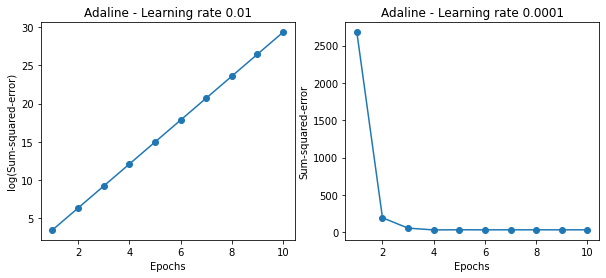

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = Adaline(n_iter=10, eta=0.01).fit(X_train, y_train)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = Adaline(n_iter=10, eta=0.0001).fit(X_train, y_train)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()